In [18]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
from torchvision import transforms

In [19]:
def plot_images(original, reconstructed, n=10):
    original = original.detach().cpu()
    reconstructed = reconstructed.detach().cpu()
    
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original images
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].permute(1, 2, 0))
        plt.title("Original")
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].permute(1, 2, 0))
        plt.title("Reconstructed")
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [20]:
model = torch.load("./models/uae_1.pth")
model.eval()

UNetAutoencoder(
  (encoder): UNetEncoder(
    (conv_1): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
    (pool_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv_2): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
    (pool_2):

In [21]:
# Define the transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to fit the model input
    transforms.ToTensor(),          # Convert the image to a tensor
    transforms.Normalize(mean=[0.4671, 0.4895, 0.4123], std=[0.1709, 0.1443, 0.1880])  # Normalize like ImageNet
])

# Load the image
image_path = './images/Apple___Apple_scab/image (200).JPG'
image = Image.open(image_path).convert('RGB')  # Convert image to RGB if it's not

# Transform the image
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

model = model.to('mps')
image_tensor = image_tensor.to('mps')

In [22]:
# Get the model output
with torch.no_grad():  # No need to compute gradients
    output = model(image_tensor)

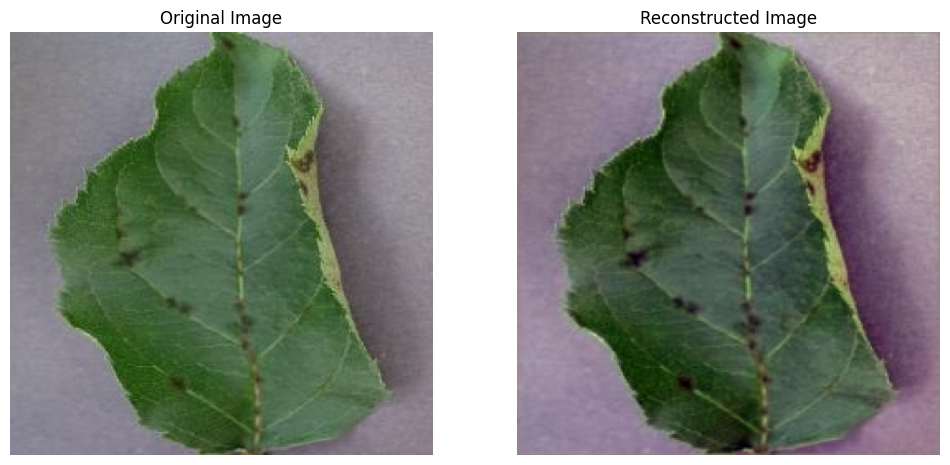

In [23]:
# Convert the tensor to an image
output_image = output.squeeze().cpu().numpy()  # Remove batch dimension and transfer to cpu
output_image = np.transpose(output_image, (1, 2, 0))  # Rearrange dimensions to width x height x channels
output_image = (output_image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406]))  # Un-normalize
output_image = np.clip(output_image, 0, 1)  # Ensure the image is between 0 and 1

# Display the images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(np.asarray(image))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()